In [378]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

# Khởi tạo trình duyệt Chrome
driver = webdriver.Chrome()

# Mở trang web Tradingview
driver.get("https://www.tradingview.com/markets/stocks-usa/market-movers-all-stocks/")

# Số lần nhấn nút "Load More" tối đa (hoặc bạn có thể sử dụng điều kiện khác)
max_loads = 5

loads = 0
data_rows = []

while loads < max_loads:
    try:
        load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".loadButton-SFwfC2e0")))
        load_more_button.click()
        loads += 1
    except:
        break

# Chờ cho dữ liệu được tải đầy đủ
WebDriverWait(driver, 10).until(EC.invisibility_of_element_located((By.CSS_SELECTOR, ".loadingContent-2CAlGV8F")))

# Tạo biến soup1 từ trang web đã tải
soup1 = BeautifulSoup(driver.page_source, 'html.parser')

# Trích xuất dữ liệu và thêm vào danh sách dòng dữ liệu
row_data = soup1.find_all('tr', class_='row-RdUXZpkv')
for row in row_data:
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    if len(individual_row) == 11:  # Kiểm tra xem có đủ dữ liệu không
        data_rows.append(individual_row)

# Tạo DataFrame từ danh sách dòng dữ liệu
data_for_all = pd.DataFrame(data_rows, columns=["Stock", "Price", "Change", "Volume", "Market Cap", "PE Ratio", "EPS", "Dividend", "Yield", "Sector", "Recommendation"])

# Đóng trình duyệt sau khi hoàn thành
driver.quit()

In [401]:
data_for_all

,Stock,Price,Change,Volume,Market Cap,PE Ratio,EPS,Dividend,Yield,Sector,Recommendation
0,"AAgilent Technologies, Inc.D",111.93,−0.67%,798884.0,3.274900e+10,29.35,3.81,−13.21%,0.79%,Health Technology,Buy
1,AAAlcoa CorporationD,28.26,−2.05%,1279000.0,5.043000e+09,—,−8.15,−259.86%,1.39%,Non-Energy Minerals,Neutral
2,AACAres Acquisition CorporationD,10.72,−0.09%,1921.0,7.568780e+08,—,−0.09,−134.01%,0.00%,Finance,—
3,AACIArmada Acquisition Corp. ID,10.70,−0.47%,835.0,9.863600e+07,—,−0.03,86.19%,0.00%,Finance,—
4,AACTAres Acquisition Corporation IID,10.26,−0.10%,151320.0,6.412500e+08,—,—,—,0.00%,Finance,—
...,...,...,...,...,...,...,...,...,...,...,...
492,AYAtlantica Sustainable Infrastructure plcD,22.40,−0.71%,48693.0,2.600000e+09,183.61,0.12,—,7.89%,Utilities,Buy
493,"AYIAcuity Brands, Inc.D",165.34,−0.30%,44353.0,5.157000e+09,14.23,11.62,11.81%,0.31%,Producer Manufacturing,Buy
494,"AYROAYRO, Inc.D",2.92,−0.34%,36574.0,1.377200e+07,—,−5.12,22.59%,0.00%,Producer Manufacturing,Strong Buy
495,"AYTUAytu BioPharma, Inc.D",1.60,−2.44%,1152.0,6.048000e+06,—,−60.38,26.73%,0.00%,Health Technology,Strong Buy


In [382]:
# Danh sách các cột chứa ký tự 'USD'
usd_columns = ["Price", "Market Cap", "EPS"]

# Chuyển đổi cột sang kiểu chuỗi và sau đó loại bỏ chữ 'USD'
for column in usd_columns:
    data_for_all[column] = data_for_all[column].astype(str).str.replace(' USD', '')

In [383]:
data_for_all.fillna(0, inplace=True)
data_for_all.isnull().sum()

Stock             0
Price             0
Change            0
Volume            0
Market Cap        0
PE Ratio          0
EPS               0
Dividend          0
Yield             0
Sector            0
Recommendation    0
dtype: int64

In [384]:
# Hàm để quy đổi đơn vị
def convert_volume(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

# Áp dụng hàm cho cột "Volume"
data_for_all['Volume'] = data_for_all['Volume'].apply(convert_volume)

In [385]:
def convert_market_cap(value):
    if 'T' in value:
        return float(value.replace('T', '')) * 1e12  # Chuyển đổi tỷ thành 10^12
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9   # Chuyển đổi tỉ thành 10^9
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6   # Chuyển đổi triệu thành 10^6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3   # Chuyển đổi ngàn thành 10^3
    else:
        return float(value)

# Áp dụng hàm cho cột "Market Cap"
data_for_all['Market Cap'] = data_for_all['Market Cap'].apply(convert_market_cap)

In [386]:
data_for_all

,Stock,Price,Change,Volume,Market Cap,PE Ratio,EPS,Dividend,Yield,Sector,Recommendation
0,"AAgilent Technologies, Inc.D",111.93,−0.67%,798884.0,3.274900e+10,29.35,3.81,−13.21%,0.79%,Health Technology,Buy
1,AAAlcoa CorporationD,28.26,−2.05%,1279000.0,5.043000e+09,—,−8.15,−259.86%,1.39%,Non-Energy Minerals,Neutral
2,AACAres Acquisition CorporationD,10.72,−0.09%,1921.0,7.568780e+08,—,−0.09,−134.01%,0.00%,Finance,—
3,AACIArmada Acquisition Corp. ID,10.70,−0.47%,835.0,9.863600e+07,—,−0.03,86.19%,0.00%,Finance,—
4,AACTAres Acquisition Corporation IID,10.26,−0.10%,151320.0,6.412500e+08,—,—,—,0.00%,Finance,—
...,...,...,...,...,...,...,...,...,...,...,...
495,AYAtlantica Sustainable Infrastructure plcD,22.40,−0.71%,48693.0,2.600000e+09,183.61,0.12,—,7.89%,Utilities,Buy
496,"AYIAcuity Brands, Inc.D",165.34,−0.30%,44353.0,5.157000e+09,14.23,11.62,11.81%,0.31%,Producer Manufacturing,Buy
497,"AYROAYRO, Inc.D",2.92,−0.34%,36574.0,1.377200e+07,—,−5.12,22.59%,0.00%,Producer Manufacturing,Strong Buy
498,"AYTUAytu BioPharma, Inc.D",1.60,−2.44%,1152.0,6.048000e+06,—,−60.38,26.73%,0.00%,Health Technology,Strong Buy


In [387]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl

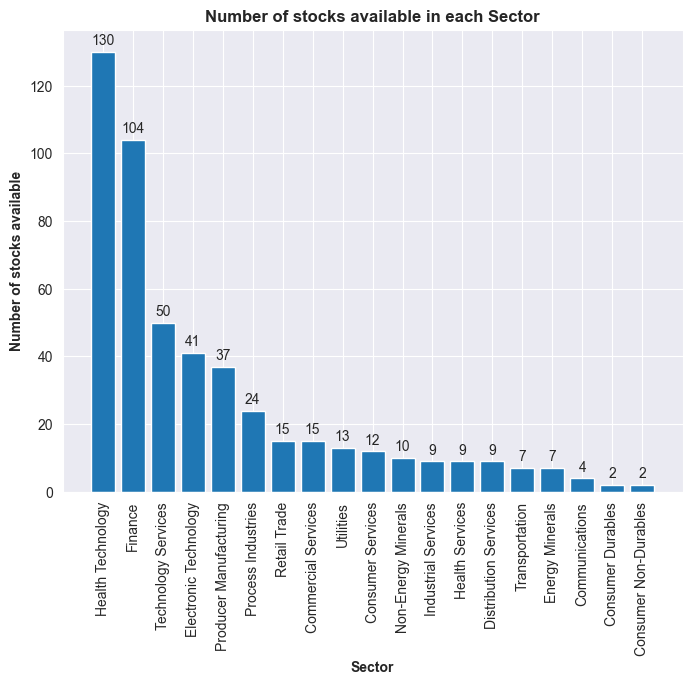

In [388]:
# Count number of unique sectors
sector_counts = data_for_all['Sector'].value_counts()
sector_counts = sector_counts.rename_axis('Sector').reset_index(name='Number of stocks available')
# print(sector_counts)

# Draw a bar chart showing number of stocks available in each sector
fig, ax = plt.subplots(figsize=(8, 6))
bars = plt.bar(sector_counts['Sector'], sector_counts['Number of stocks available'])
plt.xlabel('Sector', fontweight='bold')
plt.ylabel('Number of stocks available', fontweight='bold')
plt.title('Number of stocks available in each Sector', fontweight='extra bold')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Annotate each bar with its respective value
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

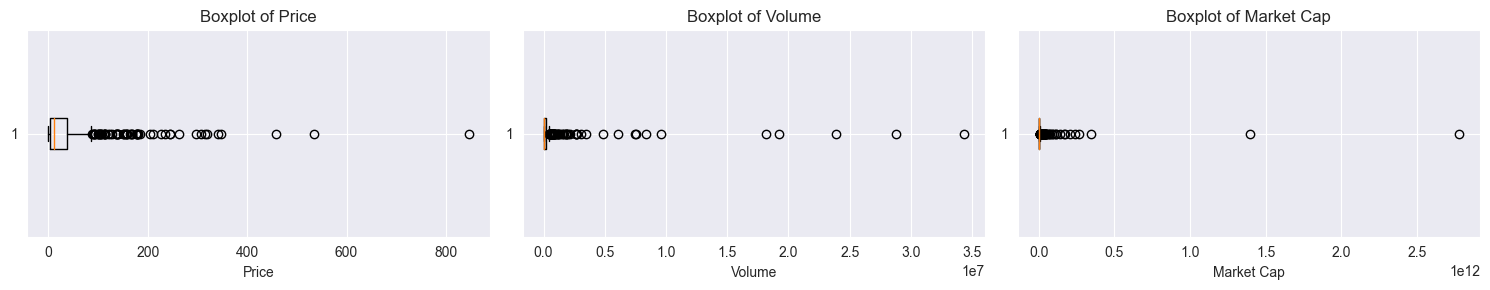

In [389]:
data_for_all['Price'] = pd.to_numeric(data_for_all['Price'], errors='coerce')
data_for_all['Market Cap'] = pd.to_numeric(data_for_all['Market Cap'], errors='coerce')
data_for_all['Volume'] = pd.to_numeric(data_for_all['Volume'], errors='coerce')

# Create a figure with subplots
plt.figure(figsize=(15, 3))

# Boxplot for 'Price'
plt.subplot(1, 3, 1)
plt.boxplot(data_for_all['Price'], vert=False)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.grid(True)

# Boxplot for 'Market Cap'
plt.subplot(1, 3, 2)
plt.boxplot(data_for_all['Volume'], vert=False)
plt.title('Boxplot of Volume')
plt.xlabel('Volume')
plt.grid(True)

# Boxplot for 'Volume'
plt.subplot(1, 3, 3)
plt.boxplot(data_for_all['Market Cap'], vert=False)
plt.title('Boxplot of Market Cap')
plt.xlabel('Market Cap')
plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [390]:
# Check the Skew, Standard Deviation and Variance of Stock Price
price_skew = data_for_all['Price'].skew()
price_std_deviation = data_for_all['Price'].std()
price_variance = data_for_all['Price'].var()

print(f'Price Skew: {price_skew:.2f}')
print(f'Standard Deviation of Price: {price_std_deviation:.2f}')
print(f'Variance of Price: {price_variance:.2f}')

# Check the Skew, Standard Deviation and Variance of Stock Volume
price_skew = data_for_all['Volume'].skew()
price_std_deviation = data_for_all['Volume'].std()
price_variance = data_for_all['Volume'].var()

print(f'Volume Skew: {price_skew:.2f}')
print(f'Standard Deviation of Volume: {price_std_deviation:.2f}')
print(f'Variance of Volume: {price_variance:.2f}')

# Check the Skew, Standard Deviation and Variance of Stock's Market Cap
price_skew = data_for_all['Market Cap'].skew()
price_std_deviation = data_for_all['Market Cap'].std()
price_variance = data_for_all['Market Cap'].var()

print(f'Market Cap Skew: {price_skew:.2f}')
print(f'Standard Deviation of Market Cap: {price_std_deviation:.2f}')
print(f'Variance of Market Cap: {price_variance:.2f}')

Price Skew: 4.96
Standard Deviation of Price: 73.03
Variance of Price: 5333.98
Volume Skew: 9.22
Standard Deviation of Volume: 2679340.89
Variance of Volume: 7178867579527.44
Market Cap Skew: 16.82
Standard Deviation of Market Cap: 141684831327.30
Variance of Market Cap: 20074591428245092040704.00


In [391]:
data_for_all["Price"].skew()

4.9627153345666315

In [392]:
data_for_all["Price"].quantile(0.995)
data_for_all = data_for_all[data_for_all["Price"]<data_for_all["Price"].quantile(0.995)].reset_index(drop=True)

In [393]:
data_for_all["Price"].skew()

2.8392213721701007

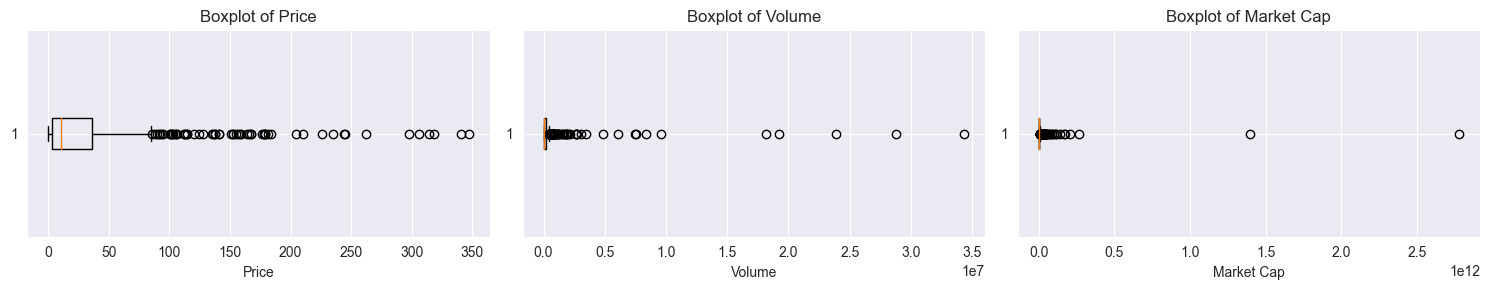

In [394]:
# Create a single figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Boxplot for Price
axs[0].boxplot(data_for_all['Price'], vert=False)
axs[0].set_title('Boxplot of Price')
axs[0].set_xlabel('Price')
axs[0].grid(True)

# Boxplot for Volume
axs[1].boxplot(data_for_all['Volume'], vert=False)
axs[1].set_title('Boxplot of Volume')
axs[1].set_xlabel('Volume')
axs[1].grid(True)

# Boxplot for Market Cap
axs[2].boxplot(data_for_all['Market Cap'], vert=False)
axs[2].set_title('Boxplot of Market Cap')
axs[2].set_xlabel('Market Cap')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure with subplots
plt.show()

In [395]:
data_for_all.describe()

,Price,Volume,Market Cap
count,497.000000,4.970000e+02,4.970000e+02
mean,34.115114,5.320975e+05,1.485724e+10
std,56.412402,2.687309e+06,1.409467e+11
min,0.105700,1.010000e+02,2.162000e+06
25%,3.260000,1.015700e+04,7.607600e+07
50%,10.760000,5.145400e+04,4.665900e+08
75%,36.000000,1.846620e+05,2.860000e+09
max,347.300000,3.432600e+07,2.778000e+12


In [ ]:
#data_for_all.info()

In [397]:
# Select data
selected_columns = ['Price', 'Volume', 'Market Cap']
selected_data = data_for_all[selected_columns]

# Calculate means, variances, covariances, and correlations
means = selected_data.mean()
variances = selected_data.var()
cov_matrix = selected_data.cov()
corr_matrix = selected_data.corr()

# Create a summary table
summary_table = pd.DataFrame({
    'Statistic': ['Mean', 'Variance', 'Covariance with Price', 'Covariance with Volume', 'Covariance with Market Cap', 'Correlation with Price', 'Correlation with Volume', 'Correlation with Market Cap'],
    'Price': [means['Price'], variances['Price'], cov_matrix.loc['Price', 'Price'], cov_matrix.loc['Volume', 'Price'], cov_matrix.loc['Market Cap', 'Price'], corr_matrix.loc['Price', 'Price'], corr_matrix.loc['Volume', 'Price'], corr_matrix.loc['Market Cap', 'Price']],
    'Volume': [means['Volume'], variances['Volume'], cov_matrix.loc['Price', 'Volume'], cov_matrix.loc['Volume', 'Volume'], cov_matrix.loc['Market Cap', 'Volume'], corr_matrix.loc['Price', 'Volume'], corr_matrix.loc['Volume', 'Volume'], corr_matrix.loc['Market Cap', 'Volume']],
    'Market Cap': [means['Market Cap'], variances['Market Cap'], cov_matrix.loc['Price', 'Market Cap'], cov_matrix.loc['Volume', 'Market Cap'], cov_matrix.loc['Market Cap', 'Market Cap'], corr_matrix.loc['Price', 'Market Cap'], corr_matrix.loc['Volume', 'Market Cap'], corr_matrix.loc['Market Cap', 'Market Cap']]
})

# Set the Statistic column as the index
summary_table.set_index('Statistic', inplace=True)

# Display the summary table
print(summary_table)

                                    Price        Volume    Market Cap
Statistic                                                            
Mean                         3.411511e+01  5.320975e+05  1.485724e+10
Variance                     3.182359e+03  7.221631e+12  1.986596e+22
Covariance with Price        3.182359e+03  8.722500e+06  1.831869e+12
Covariance with Volume       8.722500e+06  7.221631e+12  1.770963e+17
Covariance with Market Cap   1.831869e+12  1.770963e+17  1.986596e+22
Correlation with Price       1.000000e+00  5.753720e-02  2.303908e-01
Correlation with Volume      5.753720e-02  1.000000e+00  4.675596e-01
Correlation with Market Cap  2.303908e-01  4.675596e-01  1.000000e+00


add cmt here!!!

### ANALYZING THE RELATIONSHIP BETWEEN THE SECTORS AND THEIR STOCK VOLUMES

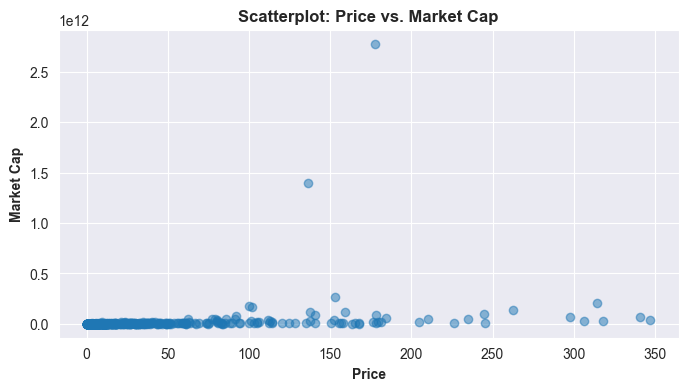

In [399]:
# Scatterplot for Price vs. Market Cap
plt.figure(figsize=(8, 4))
plt.scatter(data_for_all['Price'], data_for_all['Market Cap'], alpha=0.5)
plt.title('Scatterplot: Price vs. Market Cap', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Market Cap', fontweight='bold')

# Add a grid for better visualization
plt.grid(True)

# Show the scatterplot
plt.show()

In [40]:
# Count values lower than 100,000
count_below_100k = len(data_for_all[data_for_all['Volume'] < 100000])

# Count values between 100,000 and 1 million
count_between_100k_and_1m = len(data_for_all[(data_for_all['Volume'] >= 100000) & (data_for_all['Volume'] < 1000000)])

# Count values between 1 million and 10 million
count_between_1m_and_10m = len(data_for_all[(data_for_all['Volume'] >= 1000000) & (data_for_all['Volume'] < 10000000)])

# Count values larger than 10 million
count_above_10m = len(data_for_all[data_for_all['Volume'] >= 10000000])

# Print the counts
print("Number of values in the 'Volume' column:")
print(f"- Lower than 100,000: {count_below_100k}")
print(f"- Between 100,000 and 1 million: {count_between_100k_and_1m}")
print(f"- Between 1 million and 10 million: {count_between_1m_and_10m}")
print(f"- Larger than 10 million: {count_above_10m}")

Number of values in the 'Volume' column:
- Lower than 100,000: 345
- Between 100,000 and 1 million: 123
- Between 1 million and 10 million: 24
- Larger than 10 million: 5


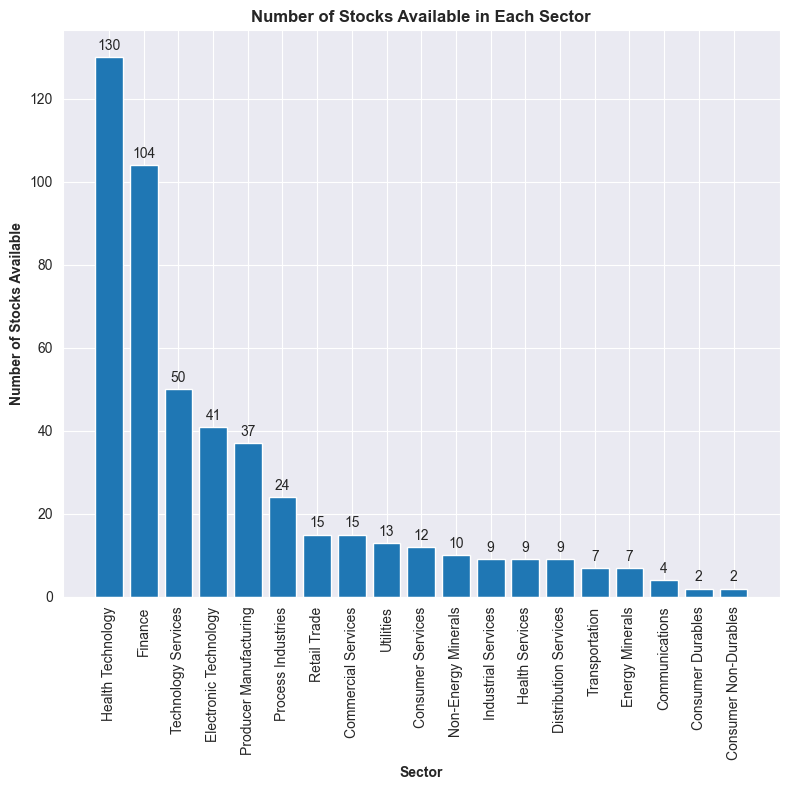

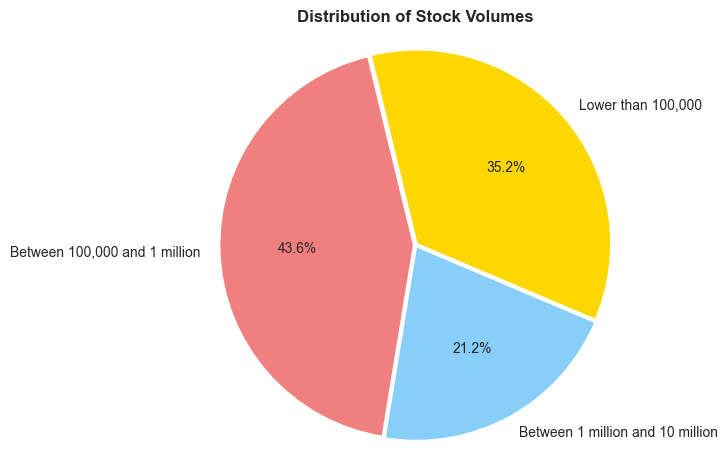

In [377]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create a bar chart using the calculated sector_counts
bars = ax.bar(sector_counts['Sector'], sector_counts['Number of stocks available'])

# Set the title and labels for the bar chart
ax.set_title('Number of Stocks Available in Each Sector', fontweight='bold')
ax.set_xlabel('Sector', fontweight='bold')
ax.set_ylabel('Number of Stocks Available', fontweight='bold')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Annotate each bar with its respective value
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the bar chart
plt.tight_layout()
plt.show()

# Define volume ranges and labels
volume_ranges = ['Lower than 100,000', 'Between 100,000 and 1 million', 'Between 1 million and 10 million']
labels = []

# Calculate the number of stocks in each volume range
volume_counts = [
    ((data_for_all['Volume'] < 100000).sum()),
    (((data_for_all['Volume'] >= 100000) & (data_for_all['Volume'] < 1000000)).sum()),
    (((data_for_all['Volume'] >= 1000000) & (data_for_all['Volume'] < 10000000)).sum())
]

# Create a pie chart
plt.pie(volume_counts, explode=(0.01, 0.01, 0.01), labels=volume_ranges, colors=colors, autopct='%1.1f%%', startangle=-23)

# Set the title for the pie chart
plt.title("Distribution of Stock Volumes", fontweight='extra bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.tight_layout()
plt.show()

ValueError: Unknown format code 'd' for object of type 'float'

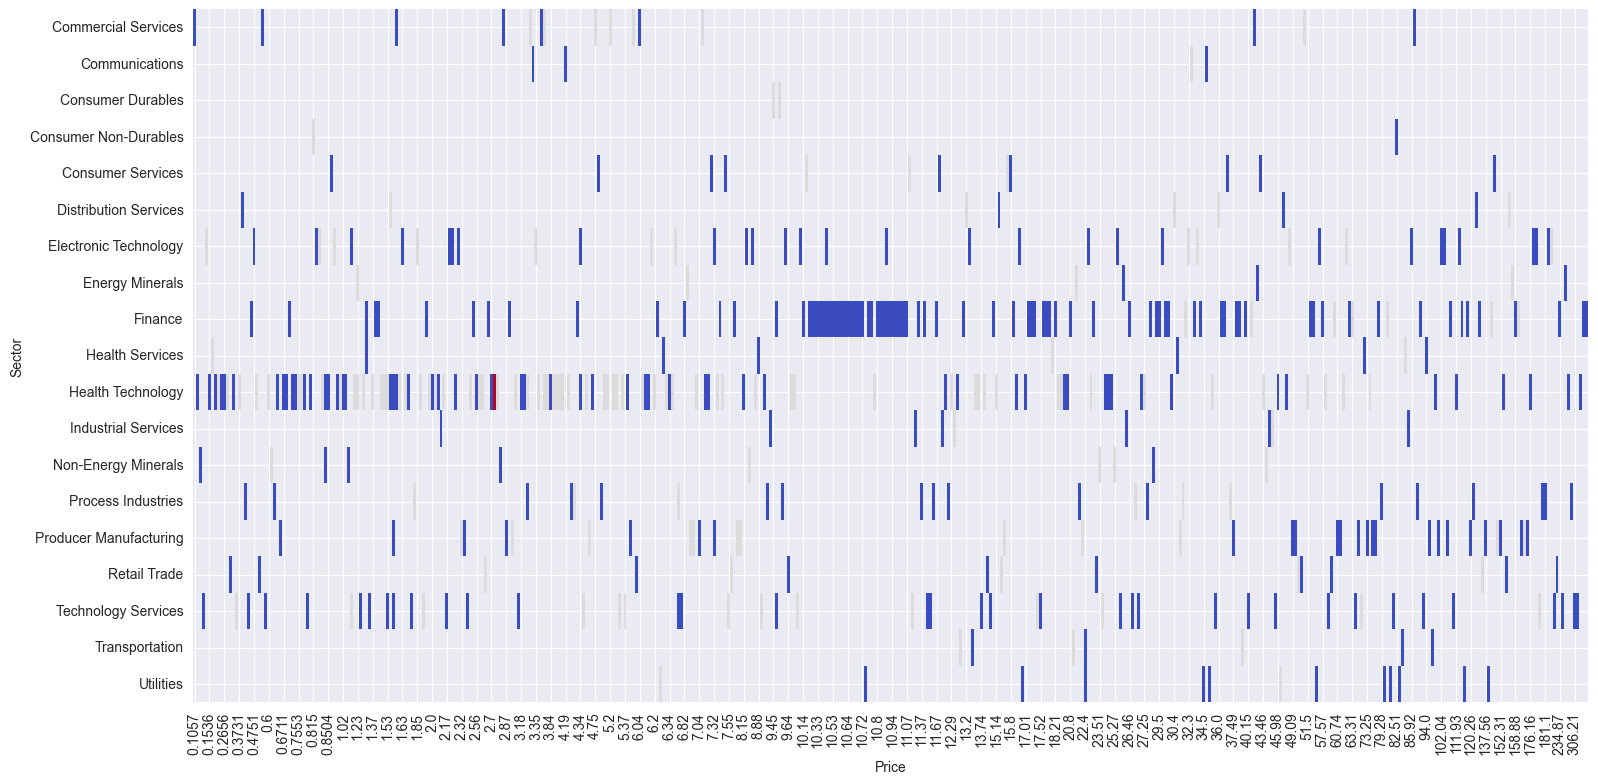

In [407]:
import seaborn as sns
# Assuming you have a DataFrame called data_for_all with 'Recommendations' and 'Volume' columns
# Replace 'Strong Buy' with numeric values for the heatmap
data_for_all['Recommendations_numeric'] = data_for_all['Recommendation'].apply(lambda x: 1 if x == 'Strong Buy' else 0)

# Create a pivot table to prepare the data for the heatmap
heatmap_data = data_for_all.pivot_table(index='Sector', columns='Price', values='Recommendations_numeric', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', cbar=False)
plt.title('Comparison of Recommendations (Strong Buy) vs. Volume', fontsize=16, fontweight='bold')
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()